In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Reading the dataset

In [1]:
data = "../airflow_first_dag/plugins/spotify_dataset.csv"

In [5]:
dataW = pd.read_csv(data)

## Initial information about the dataset

In [6]:
print(dataW.shape)

(114000, 21)


In [121]:
dataW.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Making some notes towards the head we just made...
    - We can see that we have 21 rows in this dataset.
     - There is a track_id that we can interpret as a Primary key for each song.
     - We have information such as artist names, album names, and song names, important for our final analysis.
     - We found an important variable that is its popularity.
     - The explicit variable is in Voleano.
     - Variety of information regarding each song.



In [122]:
dataW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

    - Most of our variables are volleys

In [86]:
dataW.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035,3.800486
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621,1.788295
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000,2.901100
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,3.548433
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000,4.358433
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,87.288250


### Observations on the statistics of numerical variables
escribir observaciones aqui

## Answers to questions asked

- Which are the artists that are most repeated in the dataset?

In [75]:
top_artists = dataW['artists'].value_counts().head(20)

print("The 5 artists that are repeated the most and the number of repetitions:")
print(top_artists)


The 5 artists that are repeated the most and the number of repetitions:
artists
The Beatles              279
George Jones             271
Stevie Wonder            236
Linkin Park              224
Ella Fitzgerald          222
Prateek Kuhad            217
Feid                     202
Chuck Berry              190
Håkan Hellström          183
OneRepublic              181
The Beach Boys           176
my little airport        171
Elvis Presley            169
Charlie Brown Jr.        169
Red Hot Chili Peppers    159
Bryan Adams              157
Scooter                  155
Daddy Yankee             154
Arctic Monkeys           152
BTS                      151
Name: count, dtype: int64


    - We note that several of the artists mentioned in this list are mostly English-speaking, this can be a good contribution for the final analysis

- What are the albums that are most repeated in the dataset?

In [91]:
top_albums = dataW['album_name'].value_counts().head(10)
print("The 5 most common albums and the number of repetitions:")
print(top_albums)


The 5 most common albums and the number of repetitions:
album_name
Alternative Christmas 2022     195
Feliz Cumpleaños con Perreo    184
Metal                          143
Halloween con perreito         123
Halloween Party 2022           115
The Complete Hank Williams     111
Fiesta portatil                110
Frescura y Perreo              106
Esto me suena a Farra          105
Perreo en Halloween            103
Name: count, dtype: int64


    - More than an album, by doing an analysis we can realize that they are more like a playlist that is within the application.

- What are the songs that are repeated the most in the dataset?

In [92]:
top_tracks = dataW['track_name'].value_counts().head(15)
print("The 5 most common song names and the number of repetitions:")
print(top_tracks)


The 5 most common song names and the number of repetitions:
track_name
Run Rudolph Run                   151
Halloween                          88
Frosty The Snowman                 81
Little Saint Nick - 1991 Remix     76
Last Last                          75
Christmas Time                     72
CÓMO SE SIENTE - Remix             64
Sleigh Ride                        61
RUMBATÓN                           60
X ÚLTIMA VEZ                       58
Ley Seca                           54
Feliz Cumpleaños Ferxxo            54
On Repeat                          52
Rudolph The Red-Nosed Reindeer     52
Christmas All Over Again           52
Name: count, dtype: int64


- What are the genres that top the list in the dataset?

In [93]:
top_genres = dataW['track_genre'].value_counts().head(10)
print("Top 10 most common musical genres:")
print(top_genres)


Top 10 most common musical genres:
track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
opera                1000
Name: count, dtype: int64


- What are the most popular songs? and also some random songs with their popularity

In [94]:
top_popular = dataW.nlargest(5, 'popularity')[['track_name', 'popularity']]
random_songs = dataW.sample(5)[['track_name', 'popularity']]

print("The 5 most popular songs:")
print(top_popular)
print("\n5 random songs:")
print(random_songs)

The 5 most popular songs:
                                  track_name  popularity
20001              Unholy (feat. Kim Petras)         100
81051              Unholy (feat. Kim Petras)         100
51664  Quevedo: Bzrp Music Sessions, Vol. 52          99
20008                        I'm Good (Blue)          98
30003                        I'm Good (Blue)          98

5 random songs:
               track_name  popularity
53312              I Wish           0
97007  Esqueceu Foi Porra          61
38201             May 1st          59
53994     Sound the Alarm           0
9189           Preto Zica          49


    - We can see that the most popular two are repeated.
    - Because of this, the following question occurred to us.

- How many songs are repeated?

In [96]:
repeat_songs = dataW.duplicated('track_name').sum()
print("Total repeat songs:", repeat_songs)


Total repeat songs: 40391


- At the time of making the head, we realized that the explicit variable was voleana, we want to know what its distribution is in percentages

In [99]:
explicits_songs = dataW['explicit'].sum()
no_explicits_songs = len(dataW) - explicits_songs
#Percentage
percentage_explicits = explicits_songs / len(dataW)
percentage_no_explicitas = no_explicits_songs / len(dataW)

print("Percentage of explicit songs: {:.2%}".format(percentage_explicits))
print("Percentage of no explicit songs:: {:.2%}".format(percentage_no_explicitas))

Percentage of explicit songs: 8.55%
Percentage of no explicit songs:: 91.45%


## Distribution of numerical variables


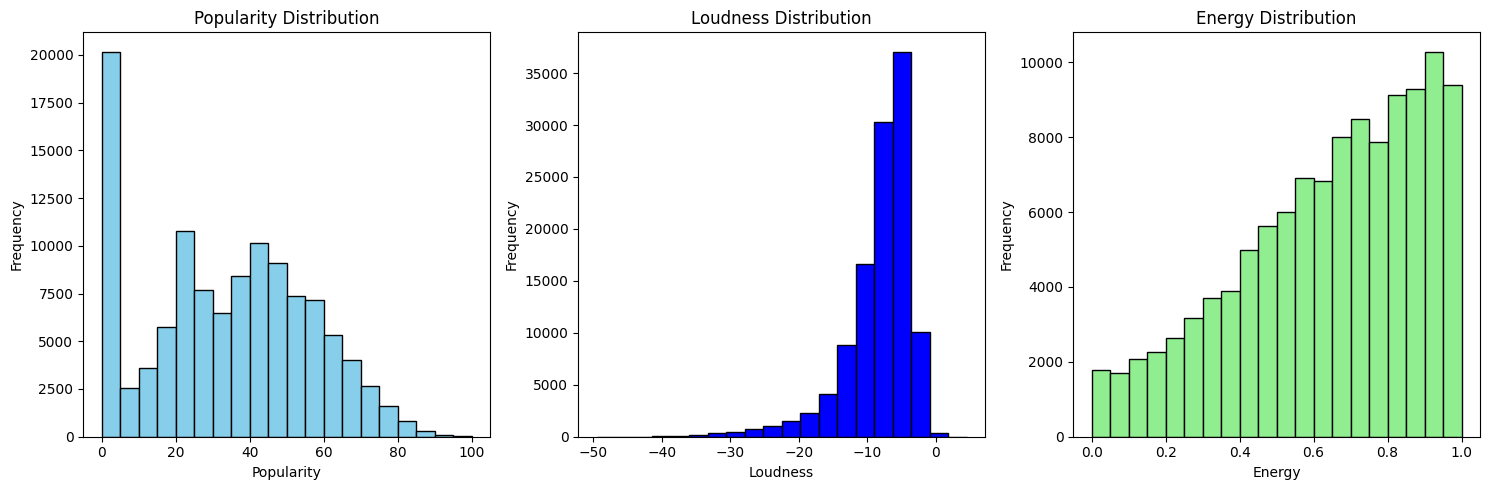

In [101]:
plt.figure(figsize=(15, 5))

# Histogram for popularity
plt.subplot(1, 3, 1)
plt.hist(dataW['popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

# Histogram for loudness
plt.subplot(1, 3, 2)
plt.hist(dataW['loudness'], bins=20, color='blue', edgecolor='black')
plt.title('Loudness Distribution')
plt.xlabel('Loudness')
plt.ylabel('Frequency')

# Histogram for energy
plt.subplot(1, 3, 3)
plt.hist(dataW['energy'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Energy Distribution')
plt.xlabel('Energy')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Observations on the previous graph
escribir observaciones aqui

- As we said, a strange distribution in popularity is observed, since we want to know what the real value of this data is.

In [102]:
zero_frequency = dataW['popularity'].value_counts()[0]

# Imprimir el resultado
print("The 0 is repeated {} times in the 'popularity' column.".format(zero_frequency))


The 0 is repeated 16020 times in the 'popularity' column.


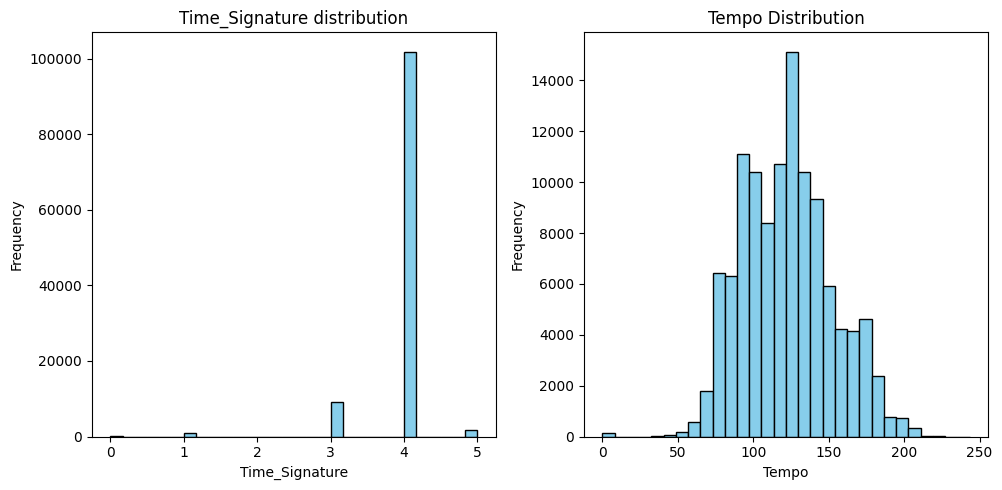

In [104]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(dataW['time_signature'], bins=30, color='skyblue', edgecolor='black')
plt.title('Time_Signature distribution')
plt.xlabel('Time_Signature')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(dataW['tempo'], bins=30, color='skyblue', edgecolor='black')
plt.title('Tempo Distribution')
plt.xlabel('Tempo')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Distribucion variables Count


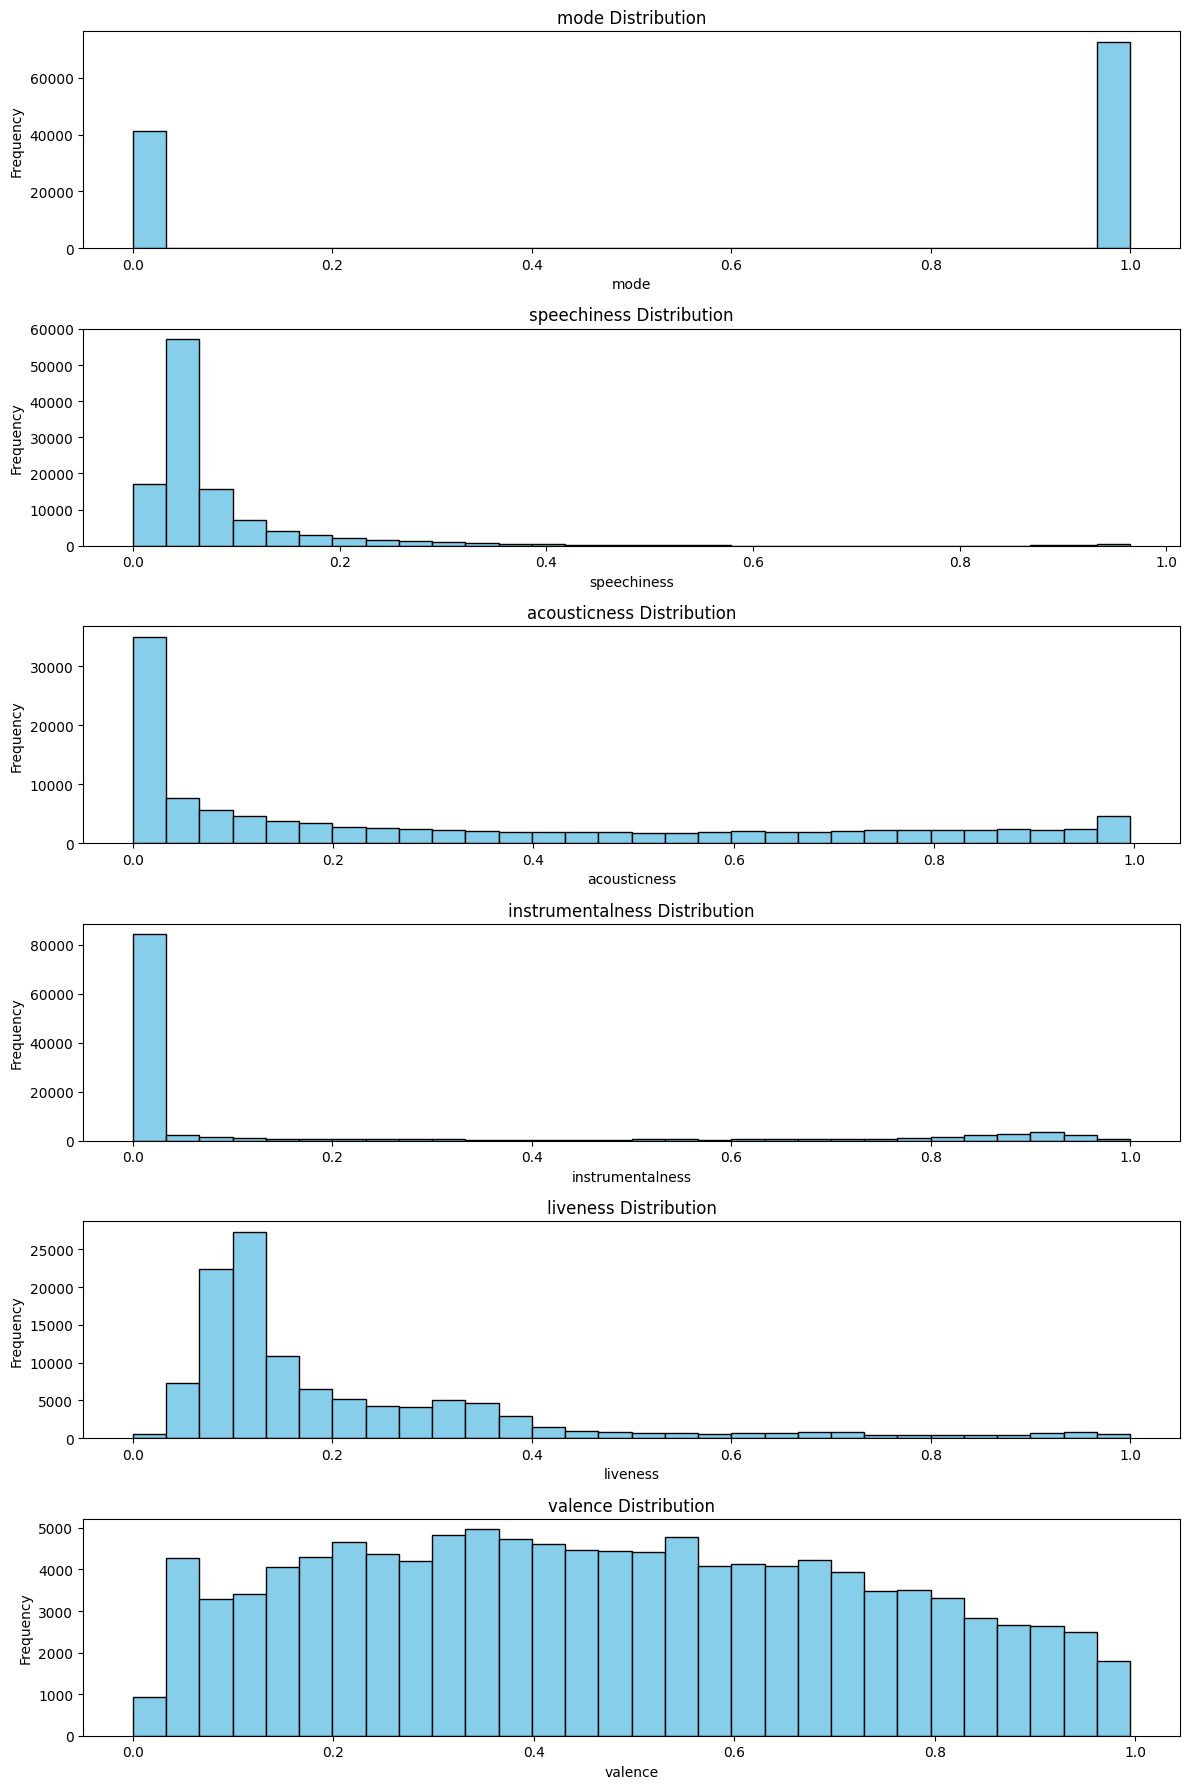

In [108]:
variables = ['mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
plt.figure(figsize=(12, 18))
num_subplots = len(variables)

for i, variable in enumerate(variables, start=1):
    plt.subplot(num_subplots, 1, i)
    plt.hist(dataW[variable], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{variable} Distribution')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Frequency')

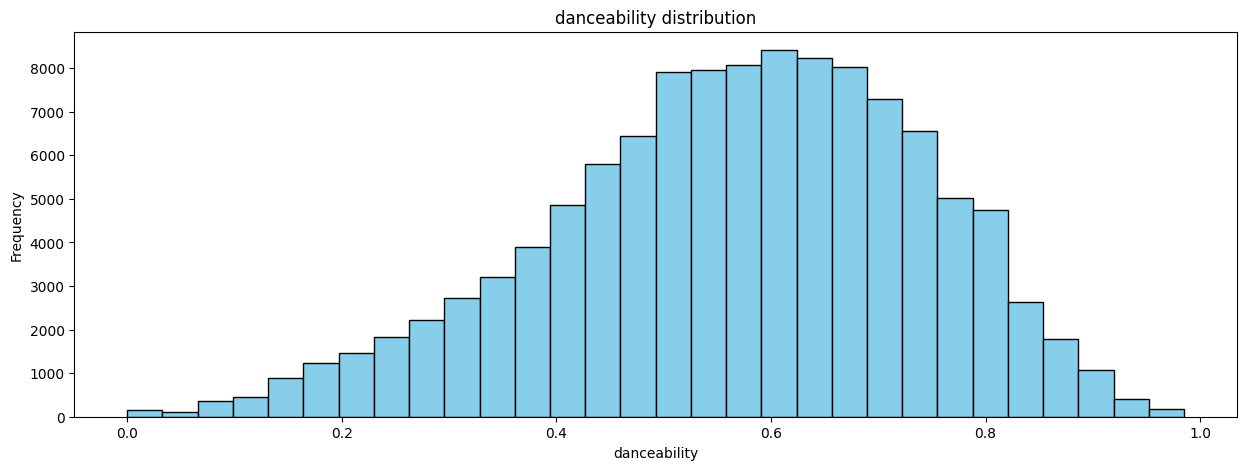

In [14]:
plt.figure(figsize=(15, 5))

plt.hist(dataW['danceability'], bins=30, color='skyblue', edgecolor='black')
plt.title('danceability distribution')
plt.xlabel('danceability')
plt.ylabel('Frequency')

### Comparison of popularity according to the explicitness of the song

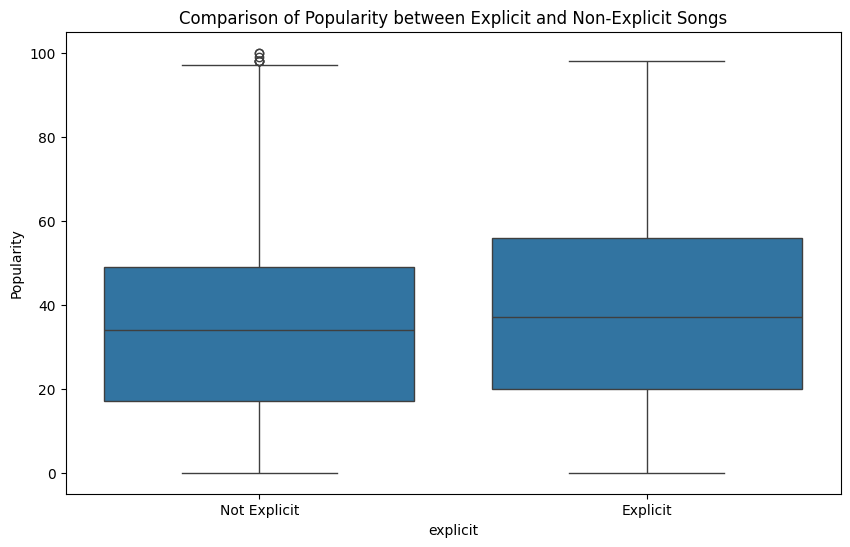

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='explicit', y='popularity', data=dataW)
plt.title('Comparison of Popularity between Explicit and Non-Explicit Songs')
plt.ylabel('Popularity')
plt.xticks([0, 1], ['Not Explicit', 'Explicit'])
plt.show()


## Correlation of variables

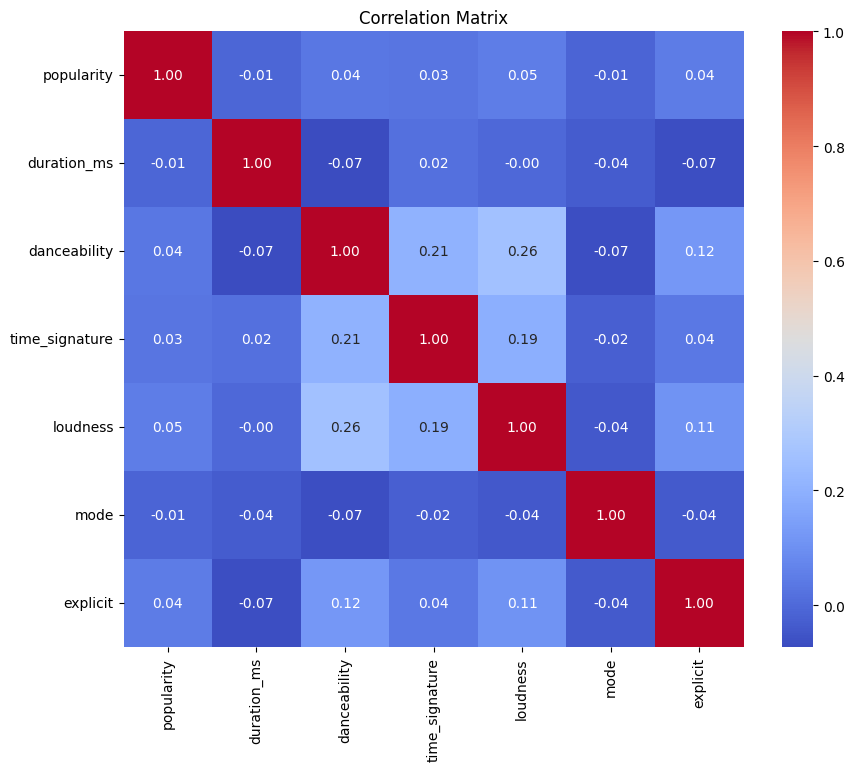

In [110]:

columns = ['popularity', 'duration_ms', 'danceability', 'time_signature', 'loudness', 'mode', 'explicit']

filtred_data = dataW[columns]

cor_matrix = filtred_data.corr()

#Map
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## Transformations

- Transformation #1
    - We add the duration family but this time in minutes, we change from milliseconds to minutes

In [7]:

dataW['duration_min'] = dataW['duration_ms'] / 60000
print(dataW[['duration_ms', 'duration_min']].head())


   duration_ms  duration_min
0       230666      3.844433
1       149610      2.493500
2       210826      3.513767
3       201933      3.365550
4       198853      3.314217


In [128]:
dataW['duration_min'].describe()

count    114000.000000
mean          3.800486
std           1.788295
min           0.000000
25%           2.901100
50%           3.548433
75%           4.358433
max          87.288250
Name: duration_min, dtype: float64

- Transformation #2
    - We decided to delete the columns that are not going to be useful for our final analysis, these rows are the following: 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'energy', 'loudness', 'duration_mls', and 'key'

    

In [16]:
drops_columns = ['Unnamed: 0','mode', 'speechiness', 'acousticness', 'instrumentalness', 
                       'liveness', 'valence', 'tempo', 'time_signature', 
                        'energy', 'loudness', 'duration_ms','key']

dataW_clean = dataW.drop(columns=drops_columns)


In [17]:
dataW_clean.head()

,track_id,artists,album_name,track_name,popularity,explicit,danceability,track_genre,duration_min
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,acoustic,3.844433
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,acoustic,2.493500
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,acoustic,3.513767
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,acoustic,3.365550
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,False,0.618,acoustic,3.314217


- Transformatio #3
    - We will make a new column where we determine if it is danceable or not, based on the percentage of Danceability

In [13]:
#New column 
dataW_clean['danceability_binary'] = dataW_clean['danceability'].apply(lambda x: 1 if x > 0.5 else 0)

dataW_clean.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,track_genre,duration_min,danceability_binary
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,acoustic,3.844433,1
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,acoustic,2.493500,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,acoustic,3.513767,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,acoustic,3.365550,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,False,0.618,acoustic,3.314217,1
